# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 7</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


## Missão: Analisar o Comportamento de Compra de Consumidores.

## Nível de Dificuldade: Alto

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

** Contagem de Consumidores **

* Número total de consumidores


** Análise Geral de Compras **

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


** Informações Demográficas Por Gênero **

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


** Análise de Compras Por Gênero **

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


** Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela): **

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


** Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


** Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


** Como considerações finais: **

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.


In [2]:
# Imports
import pandas as pd
import numpy as np

In [3]:
# Carrega o arquivo
load_file = "dados_compras.json"
dadosCompras = pd.read_json(load_file, orient = "records")
dadosCompras.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## Informações Sobre os Consumidores

In [4]:
# ** Contagem de Consumidores **
# * Número total de consumidores

# Implemente aqui sua solução
consumidoresTotal = len(np.unique(dadosCompras['Login']))
print('Existem {0} consumidores distintos nesta base de compras'.format(consumidoresTotal))

Existem 573 consumidores distintos nesta base de compras


## Análise Geral de Compras

In [5]:
# ** Análise Geral de Compras **
# * Número de itens exclusivos
# * Preço médio de compra
# * Número total de compras
# * Rendimento total

# Implemente aqui sua solução
itensExclusivos = len(np.unique(dadosCompras['Item ID']))
precoMedio = dadosCompras['Valor'].mean().round(2)
precoMediano = dadosCompras['Valor'].median()
comprasTotal = len(dadosCompras)
valorTotal = dadosCompras['Valor'].sum()
print('''Foram comprados {0} itens do catálogo, com valor mediano de R$ {1} por item e médio de R$ {4}.
Ao todo, foram realizadas {2} compras que totalizam R$ {3}.'''.format(itensExclusivos,precoMediano,comprasTotal,valorTotal,precoMedio))

Foram comprados 183 itens do catálogo, com valor mediano de R$ 2.88 por item e médio de R$ 2.93.
Ao todo, foram realizadas 780 compras que totalizam R$ 2286.33.


## Análise Demográfica

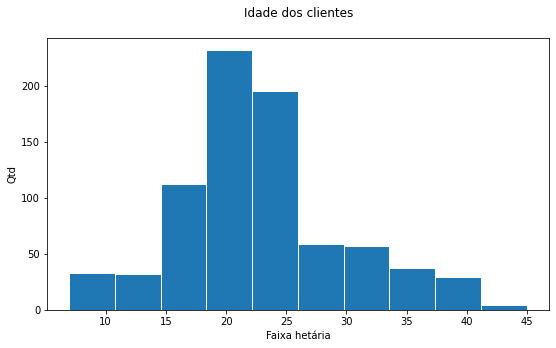

In [6]:
# Implemente aqui sua solução
import matplotlib.pyplot as plt

plt.figure(figsize = (9,5))
# plt.hist(dadosCompras['Idade'],dadosCompras['Idade'].max(),rwidth=0.9)
plt.hist(dadosCompras['Idade'],10,rwidth=0.98)
plt.xlabel('Faixa hetária')
plt.ylabel('Qtd')
plt.title('Idade dos clientes\n')
plt.show()

## Informações Demográficas Por Gênero

In [7]:
#** Informações Demográficas Por Gênero **
# * Porcentagem e contagem de compradores masculinos
# * Porcentagem e contagem de compradores do sexo feminino
# * Porcentagem e contagem de outros / não divulgados

# Implemente aqui sua solução

genero = dadosCompras['Sexo'].value_counts()
generoTotal = dadosCompras['Sexo'].count()
genero = pd.DataFrame(genero)
genero['SexoPerc'] = genero / generoTotal
genero = genero.rename(columns = {'':'Sexo','Sexo':'SexoQtd'})
print(genero)

                       SexoQtd  SexoPerc
Masculino                  633  0.811538
Feminino                   136  0.174359
Outro / Não Divulgado       11  0.014103


## Análise de Compras Por Gênero

In [8]:
# ** Análise de Compras Por Gênero **
# * Número de compras
# * Preço médio de compra
# * Valor Total de Compra
# * Compras for faixa etária

# Implemente aqui sua solução
generoMedia = dadosCompras[['Sexo','Valor']].groupby('Sexo').mean()
generoTotal = dadosCompras[['Sexo','Valor']].groupby('Sexo').sum()
idadeMin = dadosCompras['Idade'].min()
idadeMax = dadosCompras['Idade'].max()
labels = ["{0} - {1}".format(i-1, i-1 + int((idadeMax+1)/10)) for i in range(idadeMin, idadeMax+1, int((idadeMax+1)/10))]
dadosCompras['FaixaEtaria'] = pd.cut(dadosCompras.Idade,bins=10,labels=labels,ordered=False)
generoIdade = dadosCompras[['Sexo','FaixaEtaria','Valor']]
generoIdade['SexoIdade'] = generoIdade['FaixaEtaria'].astype(str) + ' | ' + generoIdade['Sexo']
generoIdade = generoIdade[['SexoIdade','Valor']].groupby(['SexoIdade']).count()
generoIdade.reindex()
print('\nPreço médio de compra por gênero')
print(generoMedia)
print('\nValor total de compra por gênero')
print(generoTotal)
print('\nCompras por gênero e faixa etária')
print(generoIdade.sort_values(by='Valor',ascending=False)[0:5])




Preço médio de compra por gênero
                          Valor
Sexo                           
Feminino               2.815515
Masculino              2.950521
Outro / Não Divulgado  3.249091

Valor total de compra por gênero
                         Valor
Sexo                          
Feminino                382.91
Masculino              1867.68
Outro / Não Divulgado    35.74

Compras por gênero e faixa etária
                     Valor
SexoIdade                 
18 - 22 | Masculino    196
22 - 26 | Masculino    168
14 - 18 | Masculino     90
30 - 34 | Masculino     46
22 - 26 | Feminino      38


<ipython-input-8-6442f5ae2040>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generoIdade['SexoIdade'] = generoIdade['FaixaEtaria'].astype(str) + ' | ' + generoIdade['Sexo']


## Consumidores Mais Populares (Top 5)

In [86]:
# ** Identifique os 5 principais compradores pelo valor total de compra e, 
# em seguida, liste (em uma tabela):**
# * Login
# * Número de compras
# * Preço médio de compra
# * Valor Total de Compra
# * Itens mais populares

# Implemente aqui sua solução
loginTotalCompras = pd.DataFrame(dadosCompras[['Login','Valor']].groupby('Login').sum())
loginTotalCompras = loginTotalCompras.sort_values(by='Valor',ascending=False)[0:5]
loginCompras = pd.DataFrame(dadosCompras[['Login','Valor']].groupby('Login').count())
loginMediaCompras = pd.DataFrame(dadosCompras[['Login','Valor']].groupby('Login').mean())
loginTotalCompras = loginTotalCompras.join(loginCompras,on='Login',how='left',rsuffix='Qtd')
loginTotalCompras = loginTotalCompras.join(loginMediaCompras,on='Login',how='left',rsuffix='Medio')
loginTotalCompras.columns = ['ValorTotal','NoCompras','ValorMedio']
loginTotalCompras = loginTotalCompras[['NoCompras','ValorMedio','ValorTotal']]
# listaUsuarios = list(loginTotalCompras.index)
# listaUsuariosItems = dadosCompras[['Login','Item ID','Valor']].loc[dadosCompras['Login'].isin(listaUsuarios)]
# listaUsuariosItems = listaUsuariosItems.sort_values(by=['Login','Item ID'])

print('\nTop {0} de compradores por valor total'.format(len(loginTotalCompras)))
print(loginTotalCompras)


Top 5 de compradores
             NoCompras  ValorMedio  ValorTotal
Login                                         
Undirrala66          5    3.412000       17.06
Saedue76             4    3.390000       13.56
Mindimnya67          4    3.185000       12.74
Haellysu29           3    4.243333       12.73
Eoda93               3    3.860000       11.58


## Itens Mais Populares

In [144]:
# ** Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): **
# * ID do item
# * Nome do item
# * Número de compras
# * Preço do item
# * Valor Total de Compra
# * Itens mais lucrativos

# Implemente aqui sua solução
itemPop = pd.DataFrame(dadosCompras[['Item ID','Valor']].groupby('Item ID').count())
itemPop = itemPop.sort_values(by='Valor',ascending=False)[0:5]
itemPopSoma = pd.DataFrame(dadosCompras[['Item ID','Valor']].groupby('Item ID').sum())
itemPop = itemPop.join(itemPopSoma,on='Item ID',how='left',rsuffix='Total')
items = list(itemPop.index)
itemNome = dadosCompras[['Item ID','Nome do Item','Valor']].loc[dadosCompras['Item ID'].isin(items)].value_counts()[0:5]
itemNome = pd.DataFrame(itemNome).reset_index()
itemNome.set_index('Item ID',inplace = True)
itemPop = itemPop.join(itemNome,on='Item ID',how='left',rsuffix='Meta')
itemPop.columns = ['Qtd','ValorTotal','Nome do Item','ValorUnt','Qtd2']
print('\nTop {0} de itens por No. de compras'.format(len(itemPop)))
print(itemPop[['Nome do Item','ValorUnt','Qtd','ValorTotal']])


Top 5 de itens por No. de compras
                                 Nome do Item  ValorUnt  Qtd  ValorTotal
Item ID                                                                 
39       Betrayal, Whisper of Grieving Widows      2.35   11       25.85
84                                 Arcane Gem      2.23   11       24.53
31                                  Trickster      2.07    9       18.63
175                Woeful Adamantite Claymore      1.24    9       11.16
13                                   Serenity      1.49    9       13.41


## Itens Mais Lucrativos

In [149]:
# ** Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **
# * ID do item
# * Nome do item
# * Número de compras
# * Preço do item
# * Valor Total de Compra

# Implemente aqui sua solução
itemLucro = pd.DataFrame(dadosCompras[['Item ID','Valor']].groupby('Item ID').sum())
itemLucro = itemLucro.sort_values(by='Valor',ascending=False)[0:5]
itemLucroQtd = pd.DataFrame(dadosCompras[['Item ID','Valor']].groupby('Item ID').count())
itemLucro = itemLucro.join(itemLucroQtd,on='Item ID',how='left',rsuffix='Total')
items = list(itemLucro.index)
itemNome = dadosCompras[['Item ID','Nome do Item','Valor']].loc[dadosCompras['Item ID'].isin(items)].value_counts()[0:5]
itemNome = pd.DataFrame(itemNome).reset_index()
itemNome.set_index('Item ID',inplace = True)
itemLucro = itemLucro.join(itemNome,on='Item ID',how='left',rsuffix='Meta')
itemLucro.columns = ['ValorTotal','Qtd','Nome do Item','ValorUnt','Qtd2']
print('\nTop {0} de itens por No. de compras'.format(len(itemPop)))
print(itemLucro[['Nome do Item','ValorUnt','Qtd','ValorTotal']])


Top 5 de itens por No. de compras
                       Nome do Item  ValorUnt  Qtd  ValorTotal
Item ID                                                       
34                  Retribution Axe      4.14    9       37.26
115      Spectral Diamond Doomblade      4.25    7       29.75
32                          Orenmir      4.95    6       29.70
103                  Singed Scalpel      4.87    6       29.22
107       Splitter, Foe Of Subtlety      3.61    8       28.88


## Fim


### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>
